# HDF5 for Python

HDF5 or Hierarchical Data Format is targeted towards managment of extermely large and complex data collections.
It is a library, providing an API to use it in C, C++, Fortran, Java and more.
It also provides utilities to interact with the datasets on command line.

- hierarchical data format with metadata support
- portable (endianess) and flexible file format and a API to store or retrieve multidimensional arrays,
- data model is defined in the file
- parallel I/O implementation (Array data transfer can be collective or independent.)
- Interface to C/C++/Fortran/Java/Python/Matlab/CLI/...
- de facto standard (netCFD also can use HDF as storage format)
- support compression on creation
- Open visualization tools suporting HDF (Paraview)

<b>h5py</b> is a python package which provides a Pythonic interface to HDF5 API.



- Group: A folder like element within an HDF5 file that might contain other groups OR datasets within it.
- Dataset: The actual data contained within the HDF5 file. Datasets are often (but don't have to be) stored within groups in the file.
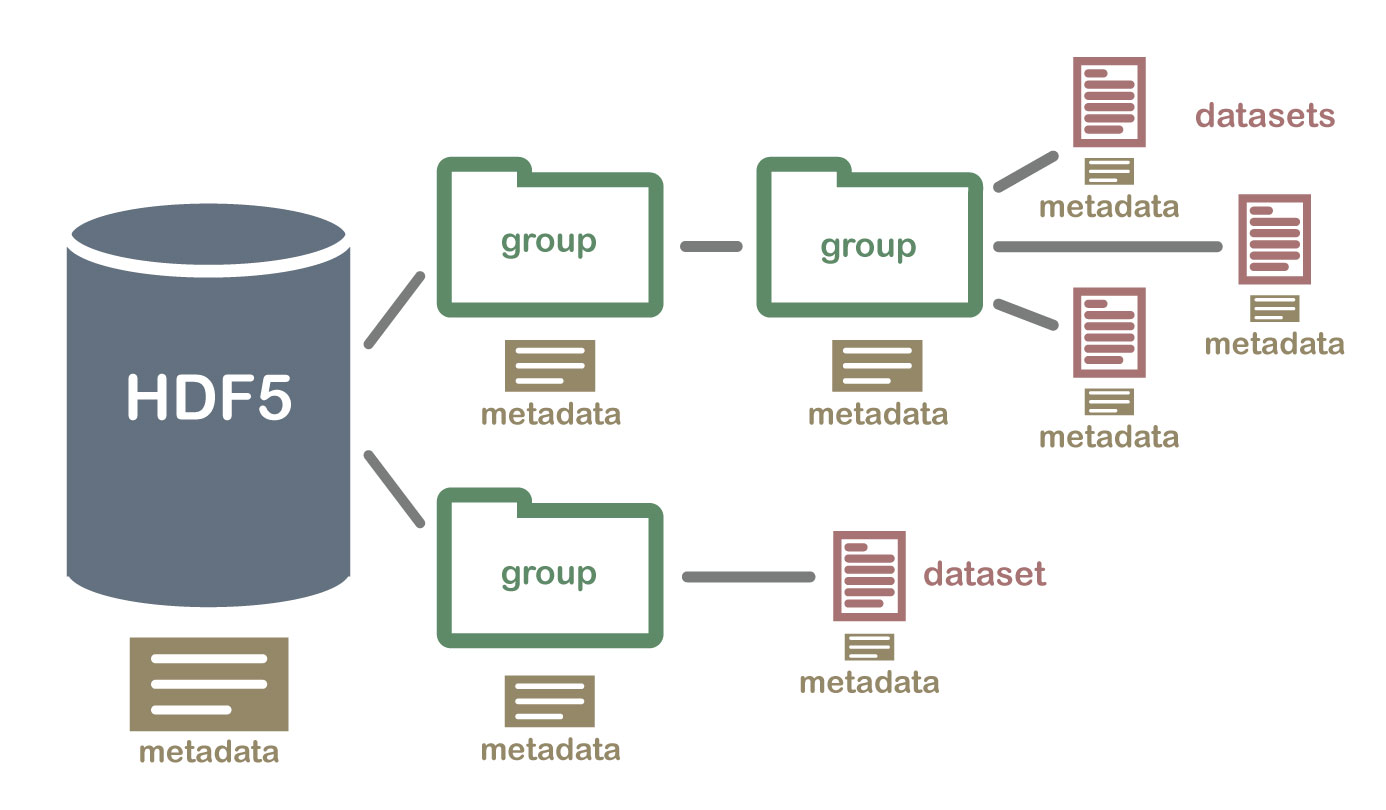


In [1]:
import h5py as h5

In [2]:
import numpy as np

In [3]:
array_len = 1500

In [4]:
fid = h5.File('myfile.h5','w')

In [5]:
input_data = np.random.rand(array_len)

In [6]:
dset = fid.create_dataset("RandomData",(array_len,), dtype='f')

In [7]:
dset[:] = input_data

In [8]:
dset.attrs["Description"] = "a 1D array of random floats"

In [9]:
print ("Length of our dataset is ", dset.shape[0])

Length of our dataset is  1500


In [10]:
print ("Datatype of our dataset is ", dset.dtype)

Datatype of our dataset is  float32


In [11]:
if 'Description' in dset.attrs:
   print ("dataset is described as:", dset.attrs['Description'])

dataset is described as: a 1D array of random floats


In [12]:
output = np.empty( array_len, dtype='f' )
output[:] = dset
print (output)

[0.6618371  0.93276495 0.22511569 ... 0.9009882  0.53971124 0.8991385 ]


In [13]:
fid.close()

In [14]:
# The is only relevant to running mpi4py in a Jupyter notebook.
import ipyparallel
cluster=ipyparallel.Client(profile='mpi_tutorial')
print("IDs:",cluster.ids)

IDs: [0, 1, 2, 3, 4, 5, 6, 7]


In [ ]:
%%px
from mpi4py import MPI